# Homework 2: Problems
## Due Friday 26 October

### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1  (50 points)
On Data Camp:

Statistical Thinking in Python (Part 2): Bootstrap confidence intervals 

This is Chapter 2.  You shouldn't need Chapter 1, but you are welcome to do it.  If this chapter interests you, then you might get something out of completing Chapters 3 and 4 as well.

## Problem 2 (25 points)
Repeat the simple MLE example from class (Inference2.ipynb), but with 2 changes.  First allow for a variable number of data points (and show for `N=3` and `N=10`.  Second, limit the range of valid solutions for $\mu$ to $\mu>1.1$ (just for `N=10`).  How does that affect your results?  Use a random seed of 42 for all.


## Problem 3 (25 points)

Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb.  Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in.  Your plots should look like the ones from class (or nicer!).  Confirm that you get the same answer for day $N$ as day $N+1$ and it doesn't matter whether is was clear or cloudy on the day that you started. 

In [2]:
#PROBLEM 1 (COMPLETED ON DATACAMP)

[1.09934283 0.97234714 1.12953771]


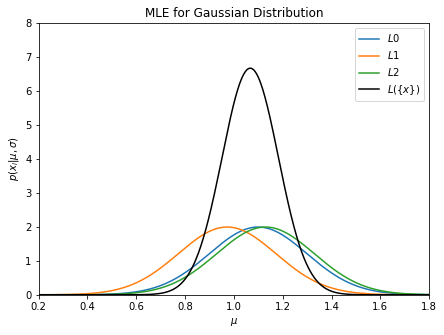

In [3]:
#PROBLEM 2 


#N=3
#Load up the algorithms we are going to need.
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
np.random.seed(42)
N = 3
mu = 1.
sigma = 0.2
sample = norm(mu,sigma).rvs(N)

print(sample)
muGrid = np.linspace(0,2,1000)
    
L=np.zeros((N, len(muGrid)))
    
for i, samp in enumerate(sample):
    
    L[i] = norm.pdf(muGrid,loc= sample[i] ,scale=sigma )

all_L=np.prod(L, axis=0)
fig, ax = plt.subplots(figsize=(7, 5))

for j in range(N):
    plt.plot(muGrid, L[j], ls='-', label=r'$L{}$'.format(j))
plt.plot(muGrid, all_L, ls='-', color='k', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

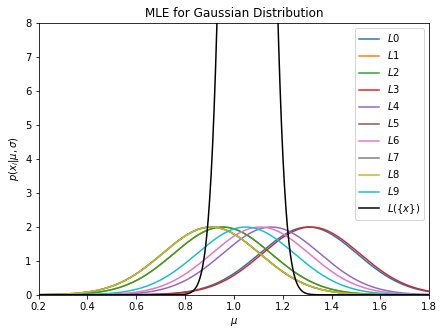

In [4]:
N=10
sample = norm(mu,sigma).rvs(N)

muGrid = np.linspace(0,2,1000)
    
L=np.zeros((N, len(muGrid)))
    
for i, samp in enumerate(sample):
    
    L[i] = norm.pdf(muGrid,loc= sample[i] ,scale=sigma )

all_L=np.prod(L, axis=0)
fig, ax = plt.subplots(figsize=(7, 5))

for j in range(N):
    plt.plot(muGrid, L[j], ls='-', label=r'$L{}$'.format(j))
plt.plot(muGrid, all_L, ls='-', color='k', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()


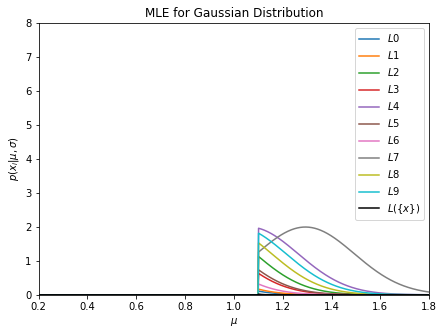

In [5]:
N=10
sample = norm(mu,sigma).rvs(N)

muGrid = np.linspace(0,2,1000)

    
L=np.zeros((N, len(muGrid)))
    
for i, samp in enumerate(sample):
    
    this_L = norm.pdf(muGrid,loc= sample[i] ,scale=sigma )
    this_L[muGrid < 1.1]=0
    L[i]=this_L
    
all_L=np.prod(L, axis=0)
fig, ax = plt.subplots(figsize=(7, 5))

for j in range(N):
    plt.plot(muGrid, L[j], ls='-', label=r'$L{}$'.format(j))
plt.plot(muGrid, all_L, ls='-', color='k', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

In [6]:
#Problem 3

In [7]:
'''
Let's say that you are an astronomer and you want to know how likely it is that tomorrow night 
will be clear given the weather tonight (clear or cloudy). From past history, you know that:

p(cleartomorrow|cloudytoday)=0.5,
p(cleartomorrow|cloudytoday)=0.5,
which means that
p(cloudytomorrow|cloudytoday)=0.5.
p(cloudytomorrow|cloudytoday)=0.5.

We also have
p(cloudytomorrow|cleartoday)=0.1,
p(cloudytomorrow|cleartoday)=0.1,
which means that
p(cleartomorrow|cleartoday)=0.9.
p(cleartomorrow|cleartoday)=0.9.

(That is, you don't live in Philadelphia.)

We can start with the sky conditions today and make predictions going forward. 
This will look like a big decision tree. After enough days, we'll reach equilibrium probabilities that have to do with the mean weather statistics (ignoring seasons) and we'll arrive at

p(clear)=0.83,
p(clear)=0.83,
and
p(cloudy)=0.17.
p(cloudy)=0.17.

You get the same answer for day NN as day N+1N+1 and it doesn't matter whether is was clear to cloudy on the day that you started.

The steps that we have taken in this process are a Markov Chain.
'''

"\nLet's say that you are an astronomer and you want to know how likely it is that tomorrow night \nwill be clear given the weather tonight (clear or cloudy). From past history, you know that:\n\np(cleartomorrow|cloudytoday)=0.5,\np(cleartomorrow|cloudytoday)=0.5,\nwhich means that\np(cloudytomorrow|cloudytoday)=0.5.\np(cloudytomorrow|cloudytoday)=0.5.\n\nWe also have\np(cloudytomorrow|cleartoday)=0.1,\np(cloudytomorrow|cleartoday)=0.1,\nwhich means that\np(cleartomorrow|cleartoday)=0.9.\np(cleartomorrow|cleartoday)=0.9.\n\n(That is, you don't live in Philadelphia.)\n\nWe can start with the sky conditions today and make predictions going forward. \nThis will look like a big decision tree. After enough days, we'll reach equilibrium probabilities that have to do with the mean weather statistics (ignoring seasons) and we'll arrive at\n\np(clear)=0.83,\np(clear)=0.83,\nand\np(cloudy)=0.17.\np(cloudy)=0.17.\n\nYou get the same answer for day NN as day N+1N+1 and it doesn't matter whether is

In [64]:

def get_p_clear(N=100000, start_day=0):
    N=N
    sun=1
    clouds=0

    today=start_day 
    
    mc=np.zeros(N)
    p_clear = np.zeros (N)
    daycount=0

    for i in range(N):
        prob = np.random.random(1)

        if today==clouds:
            #clouds
            if prob <= .5:
                tomorrow = sun
            else:
                tomorrow = clouds
        else:
            if prob <=.9:
                tomorrow = sun
            else:
                tomorrow = clouds
        mc[i] = tomorrow

        #print(prob, today, tomorrow)
        today = tomorrow
        clear_days = np.sum(mc[mc==1])
        daycount+=1

        p_clear[i] = 1.*clear_days/daycount

    print('Probability of clear day = {:.4f}'.format(p_clear[-1]))
    
    return p_clear

p_clear = get_p_clear()

Probability of clear day = 0.8308


(0, 1)

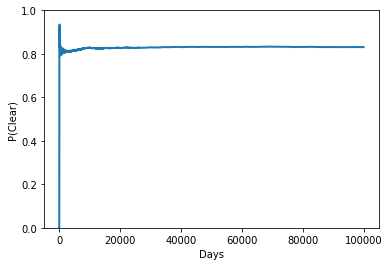

In [66]:
fig, ax = plt.subplots(1,1)
N=100000
ax.plot(np.arange(0,N,1), p_clear, lw=2)
ax.set_xlabel('Days')
ax.set_ylabel('P(Clear)')
ax.set_ylim(0,1)


In [67]:
#confirm for N+1 and start = 1
p_clear = get_p_clear(N=100001)
p_clear = get_p_clear(start_day=1)

Probability of clear day = 0.8343
Probability of clear day = 0.8334


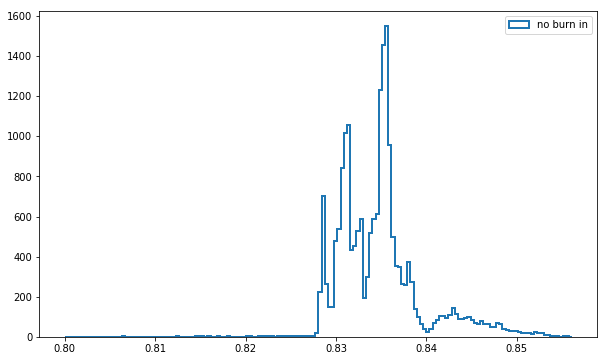

In [75]:
from astroML.plotting import hist as fancyhist
kwargs = dict ( bins='freedman', histtype='step', lw=2, range=(0.8, .86))
fig, ax = plt.subplots(1,1, figsize=(10,6))
fancyhist(p_clear[:20000], label = 'no burn in', **kwargs);
ax.set_xlim = (.8,  .9)
plt.legend()